# Student Performance Challenge

*Author: Mahmud Huseynov*
## Introduction
This notebook demonstrates the fourth and final iteration of the student performance predictor using a dataset of student attributes. This project aims to predict the final grade (G3) for students in the math  course based on demographic, social, and academic features.

## Data Provisioning

### Data Requirements

To predict student performance, the target variable selected is the final grade (G3). This is a numerical variable representing students’ final grades. Other relevant features in the dataset include study time, parental education, and previous grades (G1 and G2). Key requirements include:

- Target Variable: G3 (Final grade)
- Predictors: Variables like age, studytime, famsize, failures, G1, and G2 should be considered.
- Data Quality: There should be no missing values or outliers in predictors like previous grades or study time.

### Data Collection

This dataset was sourced from the UCI Machine Learning Repository and was initially collected in 2008 for research on secondary school student performance. It includes 649 instances from two Portuguese schools, capturing demographic, social, and academic features relevant to predicting final grades. Two datasets are provided regarding the performance in two distinct subjects: Mathematics and Portuguese language . For this challenge, I will focus on the Mathematics dataset. It contains 395 rows and 33 columns.

In [5]:
# Import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.patches as mpatches
from scipy.stats import skew, boxcox
from sklearn.linear_model import LinearRegression

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2


In [6]:
# Load the Student dataset
df_student = pd.read_csv("Data/student_data.csv")
# Show the first 5 rows
df_student.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Data Understanding
Here, we explore and understand the dataset, focusing on general statistics and the importance of each feature. Here is the data dictionary:

| Feature | Type | Description | Units / Values |
| :- | :- | :- | :- |
| **school** | Categorical | Student's school | 'GP' = Gabriel Pereira, 'MS = 'Mousinho da Silveira |
| **sex** | Categorical | Student’s sex | 'F' = Female, 'M' = Male |
| **age** | Integer | Student's age | Years (15 to 22) |
| **address** | Categorical | Type of home address | 'U' = Urban, 'R' = Rural |
| **famsize** | Categorical | Family size | 'LE3' = Less or equal to 3, 'GT3' = 'Greater than 3 |
| **Pstatus** | Categorical | Parents cohabitation status | 'T' = Together, 'A' = Apart |
| **Medu** | Integer | Mother's education level | 0 = None, 1 = Primary (4th grade), 2 = 5th to 9th grade, 3 = Secondary, 4 = Higher education |
| **Fedu** | Integer | Father's education level | Same scale as Medu |
| **Mjob** | Categorical | Mother's job | ‘teacher’, ‘health’, ‘services’ (civil services), ‘at_home’, ‘other’ |
| **Fjob** | Categorical | Father's job | Same categories as Mjob |
| **reason** | Categorical | Reason for choosing this school | ‘home’ = Close to home, ‘reputation’, ‘course’ preference, ‘other’ |
| **guardian** | Categorical | Student's guardian | ‘mother’, ‘father’, ‘other’ |
| **traveltime** | Integer | Travel time from home to school | 1 = <15 mins, 2 = 15-30 mins, 3 = 30 mins to 1 hour, 4 = >1 hour |
| **studytime** | Integer | Weekly study time | 1 = <2 hours, 2 = 2-5 hours, 3 = 5-10 hours, 4 = >10 hours |
| **failures** | Integer | Number of past class failures | 0 = None, 1-3 = 1 to 3 failures, 4 = More than 3 failures |
| **schoolsup** | Binary | Extra educational support | ‘yes’, ‘no’ |
| **famsup** | Binary | Family educational supprort | ‘yes’, ‘no’ |
| **paid** | Binary | Extra paid classes within the course subject | ‘yes’, ‘no’ |
| **activities** | Binary | Participation in extra-curricular activities | ‘yes’, ‘no’|
| **nursery** | Binary | Attended nursery school | ‘yes’, ‘no’ |
| **higher** | Binary | Intention to pursue higher education | ‘yes’, ‘no’ |
| **internet** | Binary | Internet access at home | ‘yes’, ‘no’ |
| **romantic** | Binary | In a romantic relationship | ‘yes’, ‘no’ |
| **famrel** | Integer | Quality of family relationships | 1 = Very bad to 5 = Excellent |
| **freetime** | Integer | Amount of free time after school | 1 = Very low to 5 = Very high |
| **goout** | Integer | Frequency of going out with friends | 1 = Very low to 5 = Very high |
| **Dalc** | Integer | Workday alcohol consumption | 1 = Very low to 5 = Very high |
| **Walc** | Integer | Weekend alcohol consumption | 1 = Very low to 5 = Very high |
| **health** | Integer | Current health status | 1 = Very low to 5 = Very high |
| **absences** | Integer | Number of school absences | 0 to 93 |
| **G1** | Integer | First period grade in the course | 0 to 20 |
| **G2** | Integer | Second period grade in the course | 0 to 20 |
| **G3** | Integer | Final grade in the course (target variable) | 0 to 20 |


In [9]:
# General statistics of the dataset
df_student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The dataset includes a variety of features like:

- G1, G2, G3: Grades from different periods, where G3 is the final grade (target).
- Medu, Fedu: Education levels of the mother and father.
- Studytime: Weekly study time (numeric).
- Failures: Number of past class failures (numeric).
- Absences: Number of school absences (numeric).
- Dalc, Walc: Workday and weekend alcohol consumption levels (ordinal, ranging from 1 to 5).

### Exploratory Data Analysis (EDA)
To visualize the distributions and understand relationships between features:

In [12]:
# Columns that should be numeric
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3', 'Dalc', 'Walc']

# Convert these columns to numeric
df_student[numeric_columns] = df_student[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Verify the conversion
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Let's also check whether our data is skewed or not. A skewness value close to 0 indicates symmetric data. Bigger than 0 indicates right skewness, and less than 0 indicates left skewness.

In [14]:
# Showing skewness values
skewness_values = df_student[numeric_columns].apply(skew)
print(skewness_values)

age           0.464498
Medu         -0.317170
Fedu         -0.031552
traveltime    1.600920
studytime     0.629739
failures      2.377951
absences      3.657622
G1            0.239699
G2           -0.430004
G3           -0.729887
Dalc          2.182434
Walc          0.609634
dtype: float64


Seems like most features are pretty fairly distributed. However, some features are fairly skewed, such as traveltime, failures, absences and Dalc. Let's get a visualisation on the distribution.

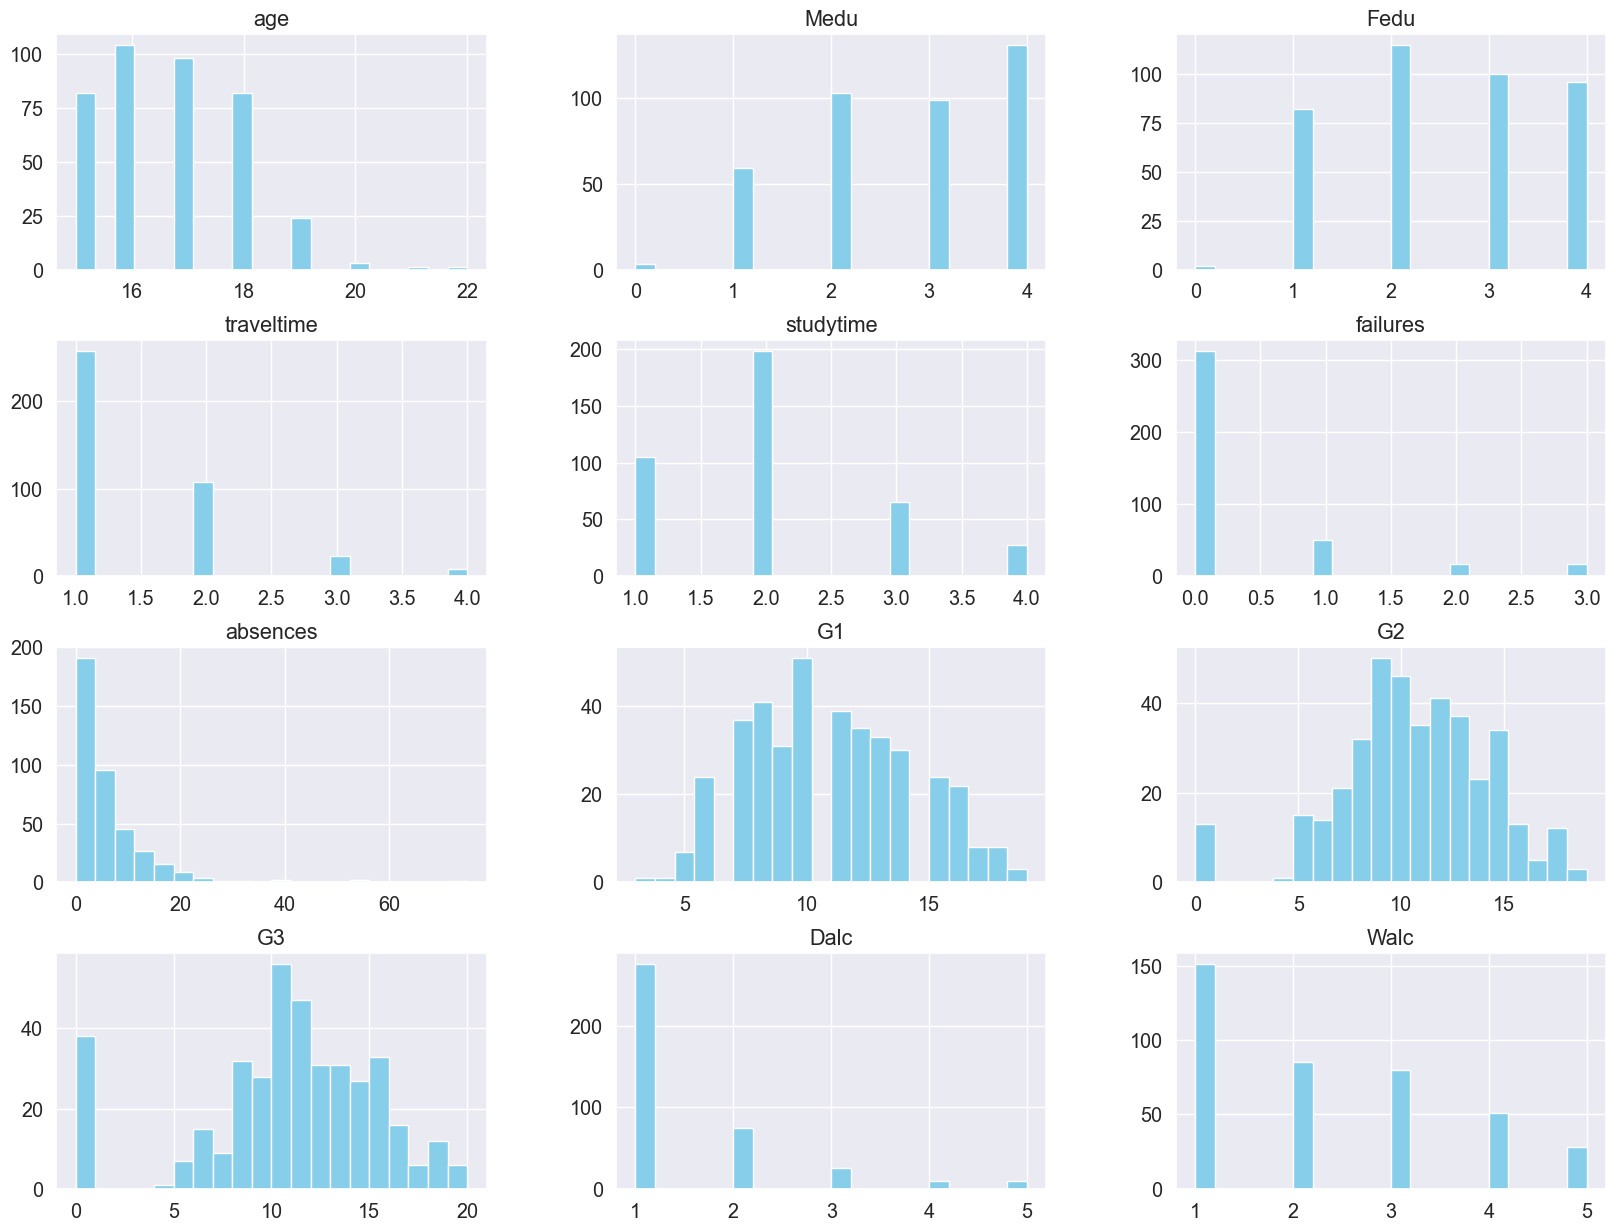

In [16]:
# Plot histograms of the numerical columns
sns.set(style='darkgrid', font_scale=1.3, rc={'figure.figsize': (20, 15)})
df_student[numeric_columns].hist(bins=20, color='skyblue')
plt.show()

This histogram provides insights into the distribution of numerical features. Grades (G1, G2, G3) follow a normal distribution, with most students scoring in the middle range, especially in the final grade (G3). Study time is concentrated at the lower levels, indicating that most students spend relatively little time studying. Failures are low for the majority, with most students having no prior class failures. Absences are generally low as well, with a few outliers showing high absence. Alcohol consumption, both during weekdays (Dalc) and weekends (Walc), is reported to be low for most students. These patterns help identify potential factors that may affect students’ final grades.

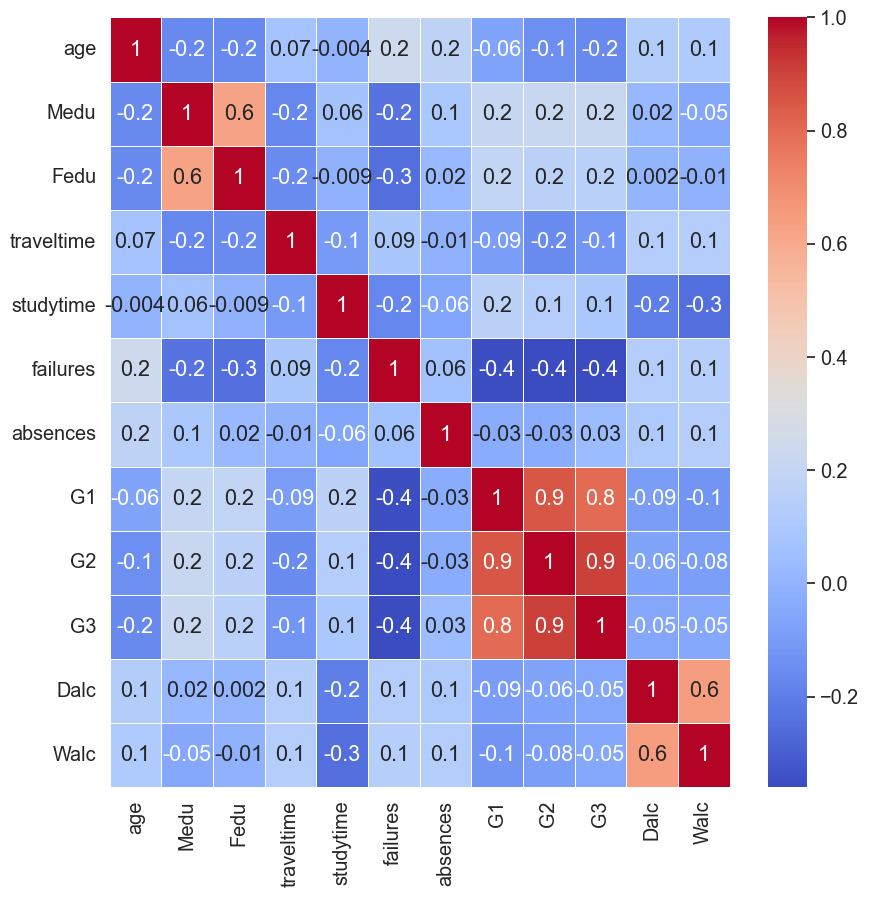

In [18]:
# Correlation heatmap to show relationships between features
plt.figure(figsize=(10, 10))
sns.heatmap(df_student[numeric_columns].corr(), cmap="coolwarm", annot=True, fmt='.1g', linewidths=.5)
plt.show()

The correlation helps identify key relationships. For instance, G1 and G2 may have a high correlation with G3, and alcohol consumption might negatively affect the final grade.


We’ll also visualize how specific features relate to the final grade:

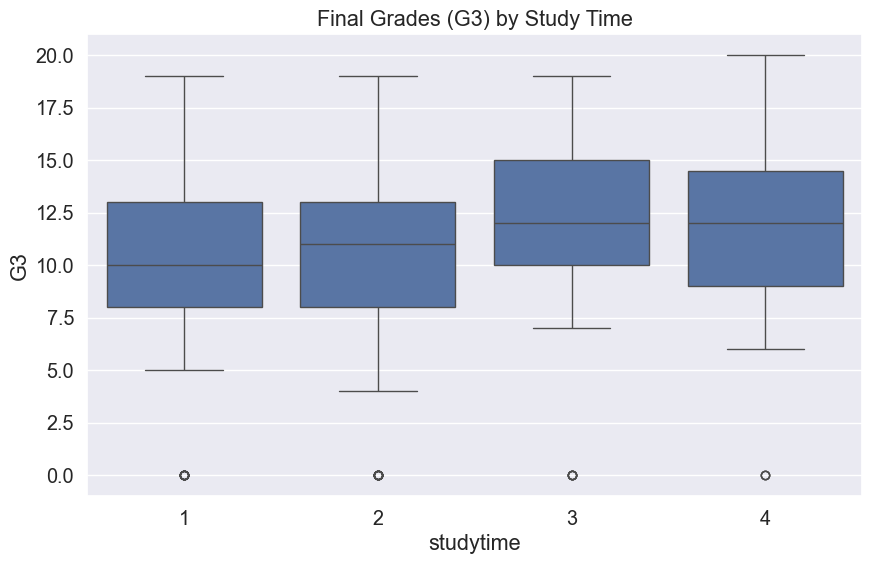

In [21]:
# Boxplot to visualize distribution of G3 (final grade) by study time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_student, x='studytime', y='G3')
plt.title('Final Grades (G3) by Study Time')
plt.show()

As expected, more study time equals a higher average G3 score. However, it is interesting to see that 3 studyhours (5-10 hours) lands a little higher than 4 (>10 hours). I will go deeper into this in a moment.

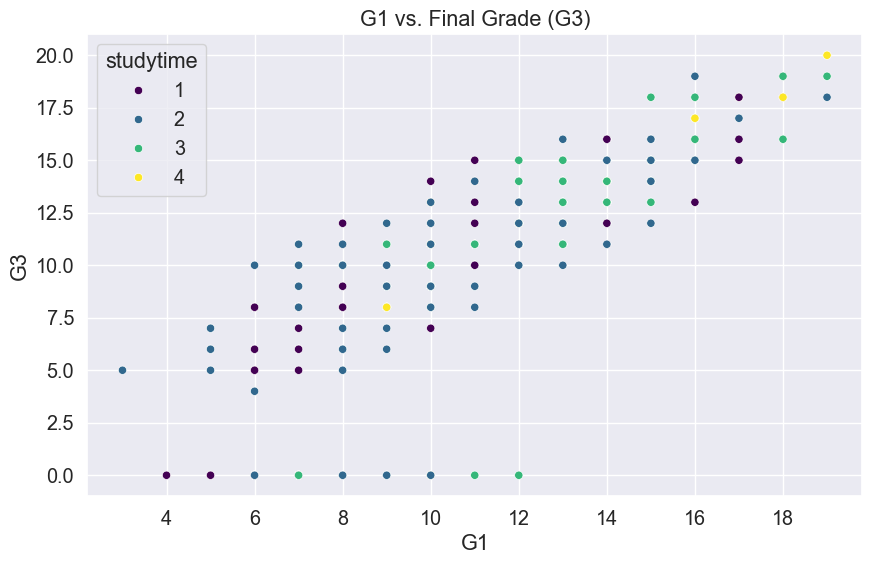

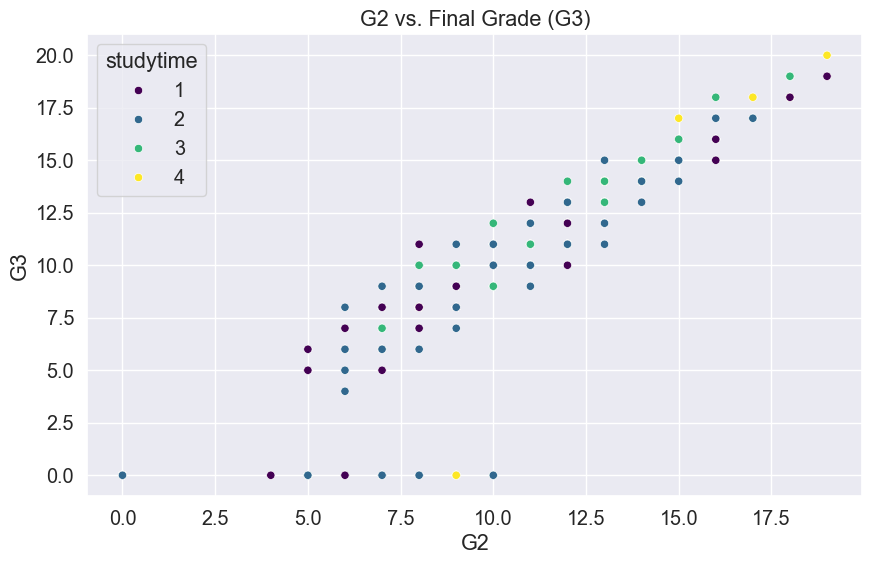

In [23]:
# Scatterplot of G1 and G2 vs G3
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_student, x='G1', y='G3', hue='studytime', palette='viridis')
plt.title('G1 vs. Final Grade (G3)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_student, x='G2', y='G3', hue='studytime', palette='viridis')
plt.title('G2 vs. Final Grade (G3)')
plt.show()

And again; the higher the studytime, the higher grade. It's interesting to note however that there are still high grades for people that only have 1 or 2 studytimes, as well as people that have low grades with 3 and 4 studytime. (There also seem to be a few students with a zero grade, which I will look in a moment aswell). There could be several reasons for this:

1. Natural Ability
- Some students may generally be smarter at math, making them able to grasp concepts quickly and perform well with minimal study.

2. Effective Study Habits
- Quality of study often matters more than quantity. Students who use efficient study techniques like active recall or spaced repetition, can achieve better outcomes in less time.

3. Classroom Engagement
- Actively participating in class, asking questions, and paying attention during lectures can reduce the need for additional study at home.

### Data Preparation
Ensuring that the dataset is clean and suitable for modeling is crucial. This includes handling missing values, outliers, or inconsistencies.

In [26]:
# Checking for Missing Values
df_student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

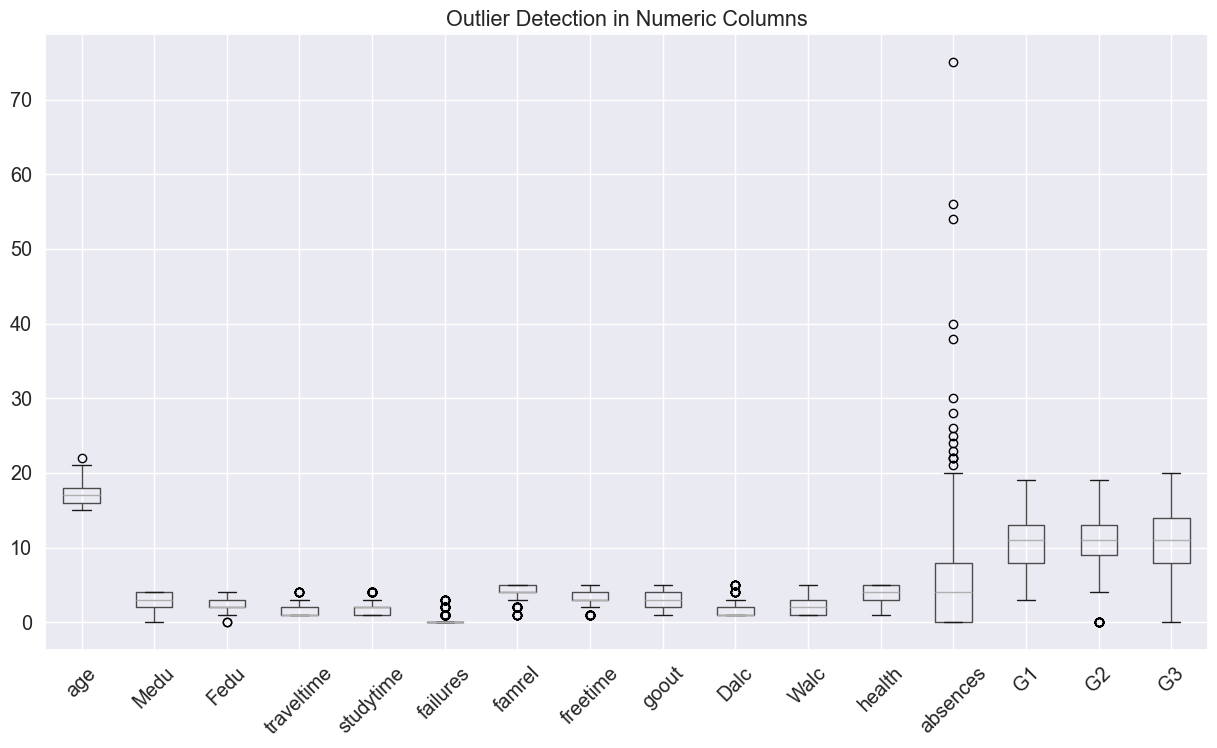

In [27]:
# Visualizing outliers using boxplots
numeric_columns = df_student.select_dtypes(include='number').columns
plt.figure(figsize=(15, 8))
df_student[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection in Numeric Columns")
plt.show()

It seems like there are a lot of outliers for absences specifically. Let's reduce the skewed data.

In [29]:
# Handling skewness
df_student['absences'] = np.log1p(df_student['absences']) 
df_student['Dalc'] = np.log1p(df_student['Dalc'])
df_student['failures'] = np.sqrt(df_student['failures'])
df_student['traveltime'], _ = boxcox(df_student['traveltime'] + 1)

In [30]:
skewness_values = df_student[numeric_columns].apply(skew)
print(skewness_values)

age           0.464498
Medu         -0.317170
Fedu         -0.031552
traveltime    0.659277
studytime     0.629739
failures      1.693542
famrel       -0.948263
freetime     -0.162730
goout         0.116060
Dalc          1.583203
Walc          0.609634
health       -0.492723
absences      0.071018
G1            0.239699
G2           -0.430004
G3           -0.729887
dtype: float64


That's a nice improvement compared to before. Now it will be easier to predict values for the modelling later, since it makes the distribution nicer.

Now, let's take a closer look at the students that have a zero on their final grade.

In [33]:
# Display the students with G3 = 0
df_student[df_student['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,0.693147,2,4,0.0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,1.098612,2,5,0.0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,0.693147,2,4,0.0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,0.693147,1,5,0.0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,0.693147,1,5,0.0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,1.098612,4,5,0.0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,0.693147,1,5,0.0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,0.693147,1,3,0.0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,0.693147,2,5,0.0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,0.693147,1,3,0.0,6,7,0


In [34]:
# Display the students with G1 = 0
df_student[df_student['G1'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


There are 38 students that have 0 as G2 and G3, but not a single one of them has a 0 for G1. This leads me to believe that these zeros are n missing values, so I will drop them.

In [36]:
# Drop rows where G2 or G3 are equal to 0
df_student = df_student[(df_student['G2'] != 0) & (df_student['G3'] != 0)]

Additional data preparation is handled later, such as one-hot encoding and scaling the features.

## Preprocessing
### Target Variable
Since the target variable (G3) is already numeric, there’s no need for encoding. However, we need to ensure that the other features are in the right format.

We’ll start by encoding categorical variables and check if the data is clean.

### Handling Categorical Variables

Categorical variables like school, sex, address, and others need to be transformed into numerical form. We’ll apply one-hot encoding to convert these categorical features into numerical features.

In [39]:
# Apply one-hot encoding to categorical features
df_student_encoded = pd.get_dummies(df_student, drop_first=True)

# Display the first few rows of the encoded dataset
df_student_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,0.247927,2,0.000000,4,3,4,0.693147,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,0.235204,2,0.000000,5,3,3,0.693147,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,0.235204,2,1.732051,4,3,2,1.098612,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,0.235204,3,0.000000,3,2,2,0.693147,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,0.235204,2,0.000000,4,3,2,0.693147,...,False,False,False,True,True,False,True,True,False,False


### Feature Selection

We need to carefully select the most relevant features to predict G3. Including too many irrelevant features can introduce noise and reduce model performance. Also, focusing on only a few distributions helps emphasize the most relevant features for the analysis. By selecting key features like grades (G1, G2, G3), study time, and failures, it stays clear while avoiding information overload. Also, keeping demographic features would raise an ethical question on whether the model should differentiate final grades of students based on factors they can't control such as age and sex. However, I will add a second version of the model just to look into this possibility.

Using the correlation matrix from our earlier analysis, we identified the features that have a high correlation with G3. These are likely to be the most informative predictors. Additionally, the grades from earlier periods (G1, G2) are highly correlated with G3, making them essential features.

In [41]:
# Selected features based on correlation analysis
features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'Dalc', 'Walc']
target = 'G3'

# Define X (features) and y (target)
X = df_student_encoded[features]
y = df_student_encoded[target]

### Splitting into Train/Test Sets:

Before training the model, we need to split the data into training and testing sets. The model will be trained on 80% of the data and tested on the remaining 20%.

In [43]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of training and test sets
print(f'Training set size: {X_train.shape[0]} rows')
print(f'Testing set size: {X_test.shape[0]} rows')

Training set size: 285 rows
Testing set size: 72 rows


In [44]:
# Initialize the StandardScaler
scaler1 = StandardScaler()

# Scale the training and test features
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

# Convert scaled data back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Modeling
Now that the data is preprocessed, we can move forward to training a machine learning model. We’ll use a Linear Regression model, which is suitable for predicting a continuous target variable like G3 (final grade).
### Linear Regression Model

In [46]:
# Initialize the linear regression model
lr_model1 = LinearRegression()

# Train the model on the scaled training data
lr_model1.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lr_model1.predict(X_test_scaled)

# Display the first few predictions
print("Predicted Grades:", y_pred[:5])
print("Actual Grades:", y_test[:5].values)

Predicted Grades: [12.31118232 18.28015053 11.04873588  9.35690302 15.05330782]
Actual Grades: [12 18 11  9 15]


Now for some evaluation metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and the R² Score to assess the performance of our model.

In [48]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.6861351927040921
Mean Absolute Error (MAE): 0.6081692064003649
R² Score: 0.9287803127770056


### Visualizing Results

We’ll use a scatter plot to visualize the relationship between the actual and predicted final grades. Ideally, the points should be close to the diagonal line, indicating that the predictions match the true values.

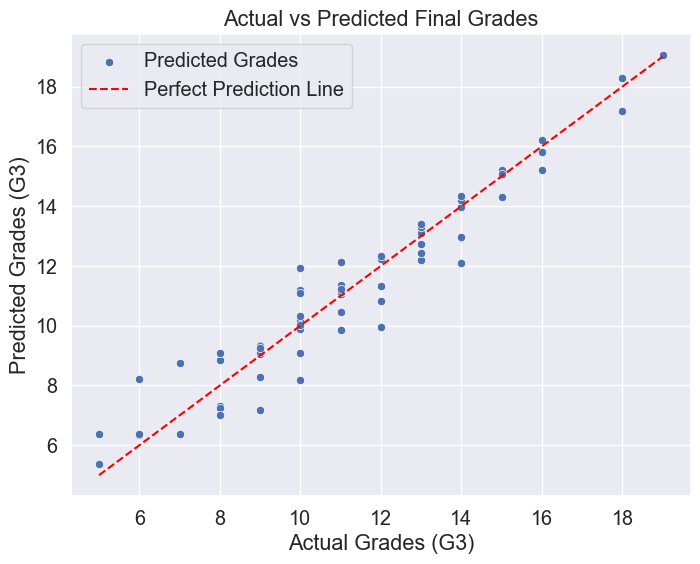

In [50]:
# Plot actual vs predicted grades
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, label="Predicted Grades")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction Line") 
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades (G3)')
plt.title('Actual vs Predicted Final Grades')
plt.legend()
plt.show()

It's great to see that the predicted and actual grades are close for the most part. There are a few outliers here and there, but nothing extreme.

### Inferencing

Now that the model is trained for predicting a student’s final grade based on given features like previous grades (G1, G2), study time, and others, it can be used to make predictions for a new student. Feel free to change the values for G1, G2, studytime, and other features to get a new prediction.

Note that the values provided need to be scaled (just like they were during training), so we will apply the same scaler before feeding the values to the model.

In [53]:
# Define new student's data
g1 = 10
g2 = 9
studytime = 0
failures = 0
absences = 0
dalc = 0
walc = 8

# Create a DataFrame for the new student's data, ensuring it has the same column structure as X_train
new_student = pd.DataFrame([{
    'G1': g1, 
    'G2': g2, 
    'studytime': studytime, 
    'failures': failures, 
    'absences': absences, 
    'Dalc': dalc, 
    'Walc': walc
}], columns=X_train.columns)

# Scale the new student's data using the same scaler that was used during training
new_student_scaled = scaler1.transform(new_student)

# Convert scaled data back to DataFrame with the same feature names
new_student_scaled = pd.DataFrame(new_student_scaled, columns=X_train.columns)

# Predict the final grade using the trained model
predicted_grade = lr_model1.predict(new_student_scaled)

# Display the result
print(f"Predicted Final Grade: {predicted_grade[0]:.2f}")

Predicted Final Grade: 9.57


### Decision Tree Model
Now, let’s move to another model: the Decision Tree. We’ll train a decision tree model and evaluate its performance using similar metrics.

In [55]:
# Initialize and train the decision tree model
dt_model1 = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model1.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model1.predict(X_test)

# Metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display the first few predictions
print("Predicted Grades:", y_pred_dt[:5])
print("Actual Grades:", y_test[:5].values)

print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R² Score: {r2_dt}")

Predicted Grades: [11.52631579 18.27272727 10.70588235  9.4516129  15.11111111]
Actual Grades: [12 18 11  9 15]
Mean Squared Error (MSE): 0.7506828816944972
Mean Absolute Error (MAE): 0.6052594965300331
R² Score: 0.9220803704482256


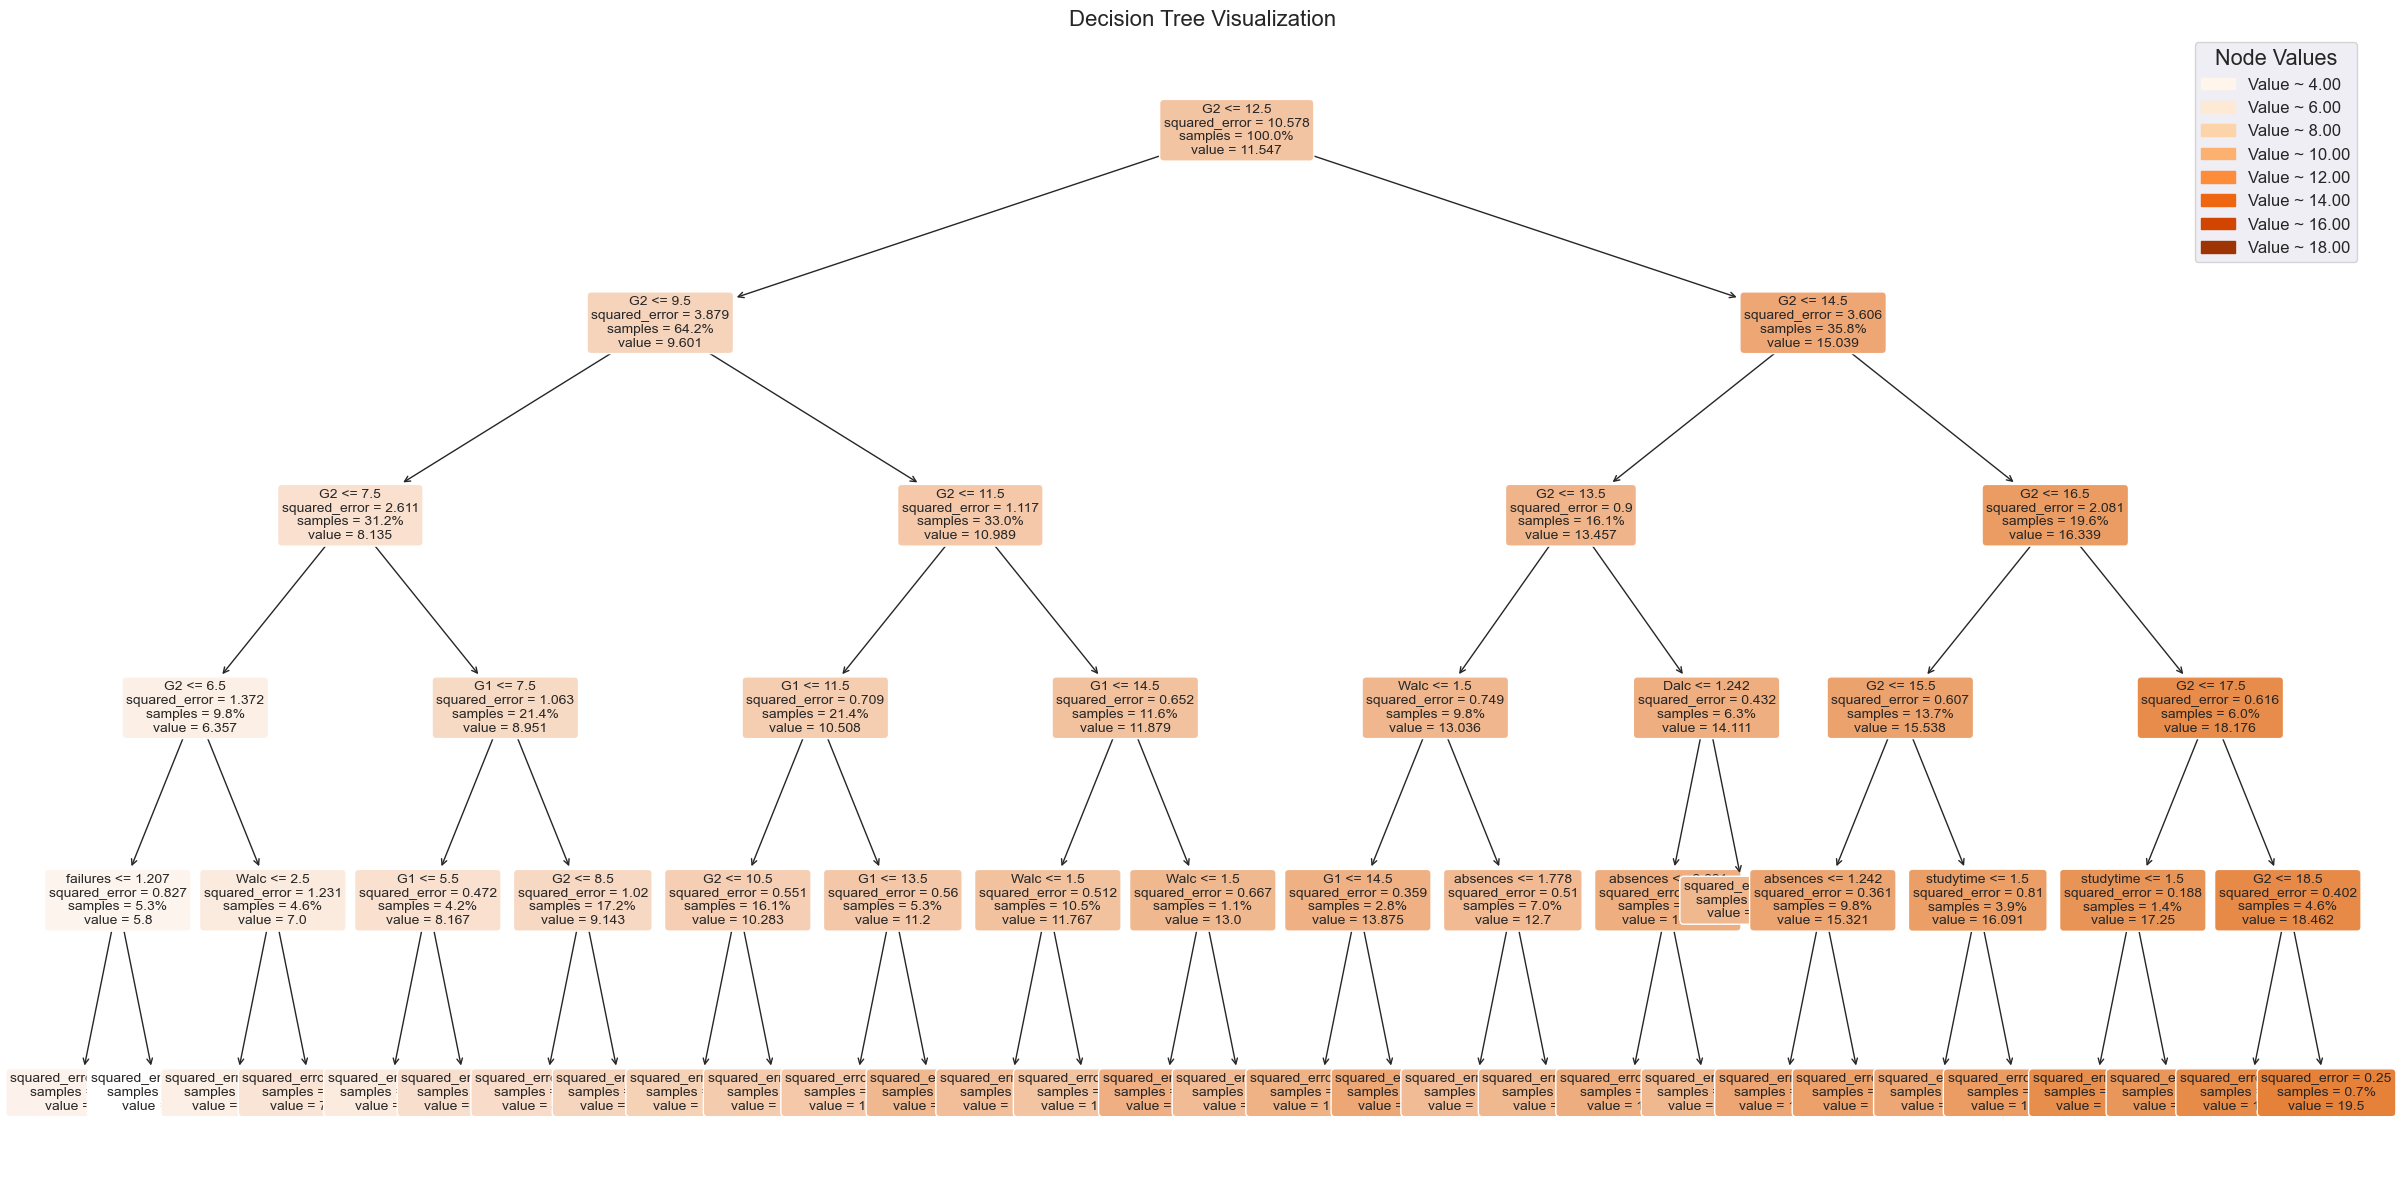

In [56]:
plt.figure(figsize=(30, 15))
plot_tree(
    dt_model1,
    feature_names=X.columns,
    filled=True,                
    rounded=True,               
    fontsize=10,
    proportion=True             
)

cmap = plt.cm.Oranges
norm = plt.Normalize(dt_model1.tree_.value.min(), dt_model1.tree_.value.max())

# Create color patches for legend
legend_patches = [
    mpatches.Patch(color=cmap(norm(value)), label=f"Value ~ {value:.2f}")
    for value in range(int(dt_model1.tree_.value.min()), int(dt_model1.tree_.value.max()) + 1, 2)
]
plt.legend(handles=legend_patches, loc="upper right", fontsize=12, title="Node Values")
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

Looking at the decision tree, you can quickly notice that G2 plays the biggest role in the final grade.

### Inferencing¶

In [59]:
# Define new student's data for Decision Tree model
g1 = 10
g2 = 0
studytime = 0
failures = 0
absences = 0
dalc = 0
walc = 8

# Create a DataFrame for the new student's data, ensuring it has the same column structure as X_train
new_student_dt = pd.DataFrame([{
    'G1': g1, 
    'G2': g2, 
    'studytime': studytime, 
    'failures': failures, 
    'absences': absences, 
    'Dalc': dalc, 
    'Walc': walc
}], columns=X_train.columns)

# Scale the new student's data using the same scaler that was used during training
new_student_scaled_dt = scaler1.transform(new_student_dt)

# Convert scaled data back to DataFrame with the same feature names
new_student_scaled_dt = pd.DataFrame(new_student_scaled_dt, columns=X_train.columns)

# Predict the final grade using the trained Decision Tree model
predicted_grade_dt = dt_model1.predict(new_student_scaled_dt)

# Display the result
print(f"Predicted Final Grade (Decision Tree): {predicted_grade_dt[0]:.2f}")

Predicted Final Grade (Decision Tree): 6.00


### Random Forest Model
Next, let’s use a Random Forest Regressor to improve accuracy. A Random Forest is a powerful ensemble method that combines the predictions of multiple decision trees.

In [61]:
# Initialize the Random Forest model
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model1.predict(X_test_scaled)

# Display the first few predictions
print("Predicted Grades:", y_pred_rf[:5])
print("Actual Grades:", y_test[:5].values)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.2f}")

Predicted Grades: [11.45       18.87583333 10.92333333  9.77       15.44333333]
Actual Grades: [12 18 11  9 15]
Random Forest - Mean Squared Error: 0.81
Random Forest - Mean Absolute Error: 0.68
Random Forest - R² Score: 0.92


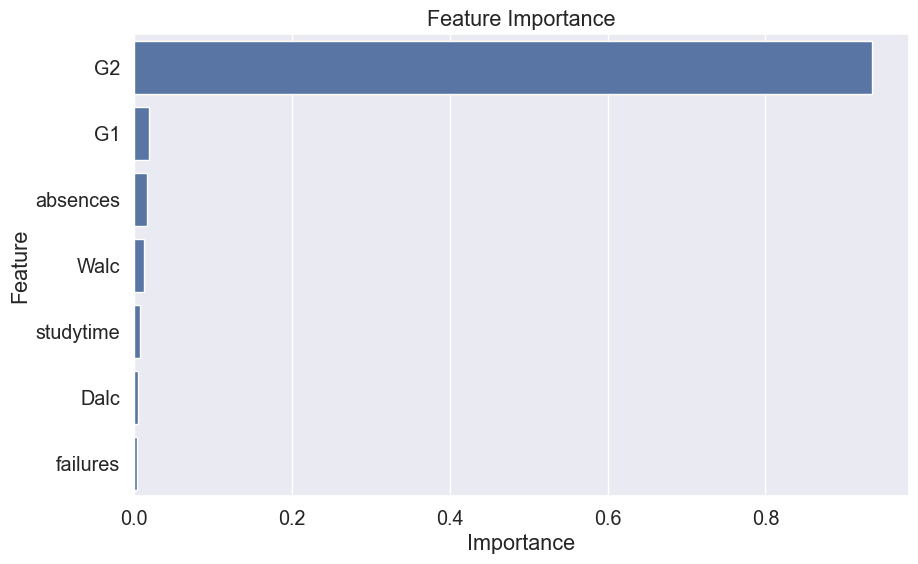

In [62]:
importances = rf_model1.feature_importances_
features = X.columns

# Sort and plot feature importances
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=[features[i] for i in sorted_indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Just like I said before about G2 being the most significant factor of the G3 grade.

### Inferencing¶

In [65]:
# Define new student's data for Random Forest model
g1 = 10
g2 = 9
studytime = 0
failures = 0
absences = 0
dalc = 0
walc = 8


# Create a DataFrame for the new student's data, ensuring it has the same column structure as X_train
new_student_rf = pd.DataFrame([{
    'G1': g1, 
    'G2': g2, 
    'studytime': studytime, 
    'failures': failures, 
    'absences': absences, 
    'Dalc': dalc, 
    'Walc': walc
}], columns=X_train.columns)

# Scale the new student's data using the same scaler that was used during training
new_student_scaled_rf = scaler1.transform(new_student_rf)

# Convert scaled data back to DataFrame with the same feature names
new_student_scaled_rf = pd.DataFrame(new_student_scaled_rf, columns=X_train.columns)

# Predict the final grade using the trained Random Forest model
predicted_grade_rf = rf_model1.predict(new_student_scaled_rf)

# Display the result
print(f"Predicted Final Grade (Random Forest): {predicted_grade_rf[0]:.2f}")

Predicted Final Grade (Random Forest): 9.63


## Conclusion
In this final iteration of the Student Performance Predictor, some critical insights emerged. By analyzing and visualizing the features, what impacted final math grades (G3) became clearer. Study time, previous grades (G1 and G2), and alcohol consumption stood out as key predictors of student success. The exploratory data analysis showed that increased study time generally correlated to higher grades, although there appears to be a lower grade for the highest study time bracket, possibly due to student fatigue.

- Linear Regression: The model performed well with a relatively high R² score of ~0.93, indicating that the model’s predictions are reasonably close to the actual values.
- Decision Tree: A decision tree with limited depth showed decent performance, but it had a slightly lower R² score compared to Linear Regression.
- Random Forest: The Random Forest model delivered the best results with an R² score of ~0.92 and lower error metrics.

# Second version
I am curious for something though. What would happen if I didn't remove any features? What if I keep features that normally shouldn't have a big effect like age and sex? Will the model still differentiate them and make a correlation solely on demographic features that the student has no control over? Let's have a look. 

## Preprocessing

### Feature Selection

All of the features will be selected.

In [70]:
target = 'G3'

# Define X (features) and y (target)
X = df_student_encoded.drop(columns=[target])  # Drop the target variable (G3) from the features
y = df_student_encoded[target]  # Keep the target variable (G3)

### Splitting into Train/Test Sets:

Before training the model, we need to split the data into training and testing sets. Again, the model will be trained on 80% of the data and tested on the remaining 20%.

In [72]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of training and test sets
print(f'Training set size: {X_train.shape[0]} rows')
print(f'Testing set size: {X_test.shape[0]} rows')

Training set size: 285 rows
Testing set size: 72 rows


In [73]:
# Initialize the StandardScaler
scaler2 = StandardScaler()

# Scale the training and test features
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

# Convert scaled data back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Modeling
Now that the data is preprocessed, we can move forward to training a machine learning model. We’ll use Linear Regression model again.
### Linear Regression Model

In [75]:
# Initialize the linear regression model
lr_model2 = LinearRegression()

# Train the model on the scaled training data
lr_model2.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lr = lr_model2.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display the first few predictions
print("Predicted Grades:", y_pred[:5])
print("Actual Grades:", y_test[:5].values)

print(f"Linear Regression - Mean Squared Error: {mse_lr:.2f}")
print(f"Linear Regression - Mean Absolute Error: {mae_lr:.2f}")
print(f"Linear Regression - R² Score: {r2_lr:.2f}")

Predicted Grades: [12.31118232 18.28015053 11.04873588  9.35690302 15.05330782]
Actual Grades: [12 18 11  9 15]
Linear Regression - Mean Squared Error: 0.83
Linear Regression - Mean Absolute Error: 0.69
Linear Regression - R² Score: 0.91


### Visualizing Results

We’ll use a scatter plot to visualize the relationship between the actual and predicted final grades. Ideally, the points should be close to the diagonal line, indicating that the predictions match the true values.

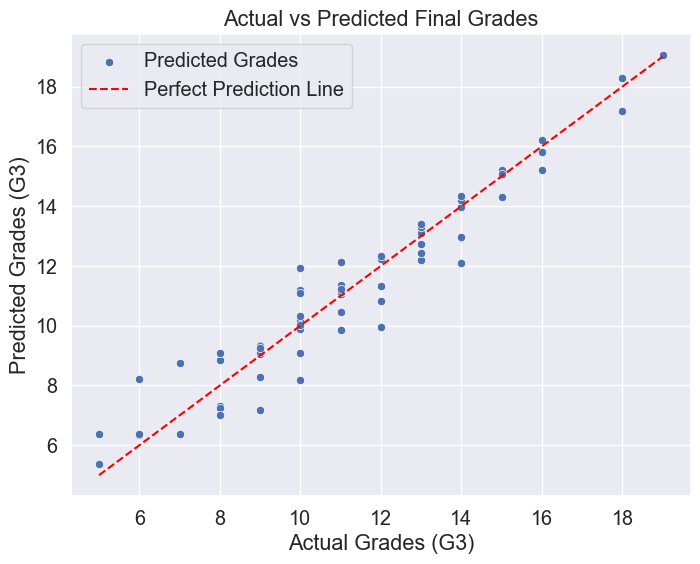

In [77]:
# Plot actual vs predicted grades
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, label="Predicted Grades")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction Line")
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades (G3)')
plt.title('Actual vs Predicted Final Grades')
plt.legend() 
plt.show()

Wow. It's still fairly accurate. However, you can definitely tell that it isn't as close to the prediction line compared to the one with feature selection.

### Inferencing

In [80]:
# Define the known data for the new student, setting defaults for categorical (one-hot encoded) variables
new_student = pd.DataFrame([{
    'age': 22,
    'Medu': 4,
    'Fedu': 4,
    'traveltime': 2,
    'studytime': 2,
    'failures': 0,
    'famrel': 4,
    'freetime': 3,
    'goout': 4,
    'Dalc': 1,
    'Walc': 1,
    'health': 3,
    'absences': 4,
    'G1': 14,
    'G2': 12,
    # One-hot encoded features: setting to 0 or 1 as appropriate for a new student
    'school_MS': 0,
    'sex_M': 1,
    'address_U': 1,
    'famsize_LE3': 0,
    'Pstatus_T': 0,
    'Mjob_health': 0,
    'Mjob_other': 1,
    'Mjob_services': 0,
    'Mjob_teacher': 0,
    'Fjob_health': 0,
    'Fjob_other': 1,
    'Fjob_services': 0,
    'Fjob_teacher': 0,
    'reason_home': 0,
    'reason_other': 0,
    'reason_reputation': 1,
    'guardian_mother': 0,
    'guardian_other': 0,
    'schoolsup_yes': 0,
    'famsup_yes': 1,
    'paid_yes': 0,
    'activities_yes': 1,
    'nursery_yes': 1,
    'higher_yes': 1,
    'internet_yes': 1,
    'romantic_yes': 0
}], columns=X_train.columns)

# Scale the new student's data using the same scaler that was used during training
new_student_scaled = scaler2.transform(new_student)

# Convert new_student_data into a DataFrame with the same column structure as the training data
new_student_scaled = pd.DataFrame(new_student_scaled, columns=X_train.columns)

# Make a prediction with the model
predicted_grade = lr_model2.predict(new_student_scaled)

# Display the predicted final grade
print(f"Predicted Final Grade: {predicted_grade[0]:.2f}")

Predicted Final Grade: 5.49


### Decision Tree Model

In [82]:
# Initialize the Decision Tree model
dt_model2 = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
dt_model2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_model2.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display the first few predictions
print("Predicted Grades:", y_pred_dt[:5])
print("Actual Grades:", y_test[:5].values)

print(f"Decision Tree - Mean Squared Error: {mse_dt:.2f}")
print(f"Decision Tree - Mean Absolute Error: {mae_dt:.2f}")
print(f"Decision Tree - R² Score: {r2_dt:.2f}")

Predicted Grades: [11.62962963 18.33333333 10.70588235  9.4516129  15.11111111]
Actual Grades: [12 18 11  9 15]
Decision Tree - Mean Squared Error: 0.88
Decision Tree - Mean Absolute Error: 0.70
Decision Tree - R² Score: 0.91


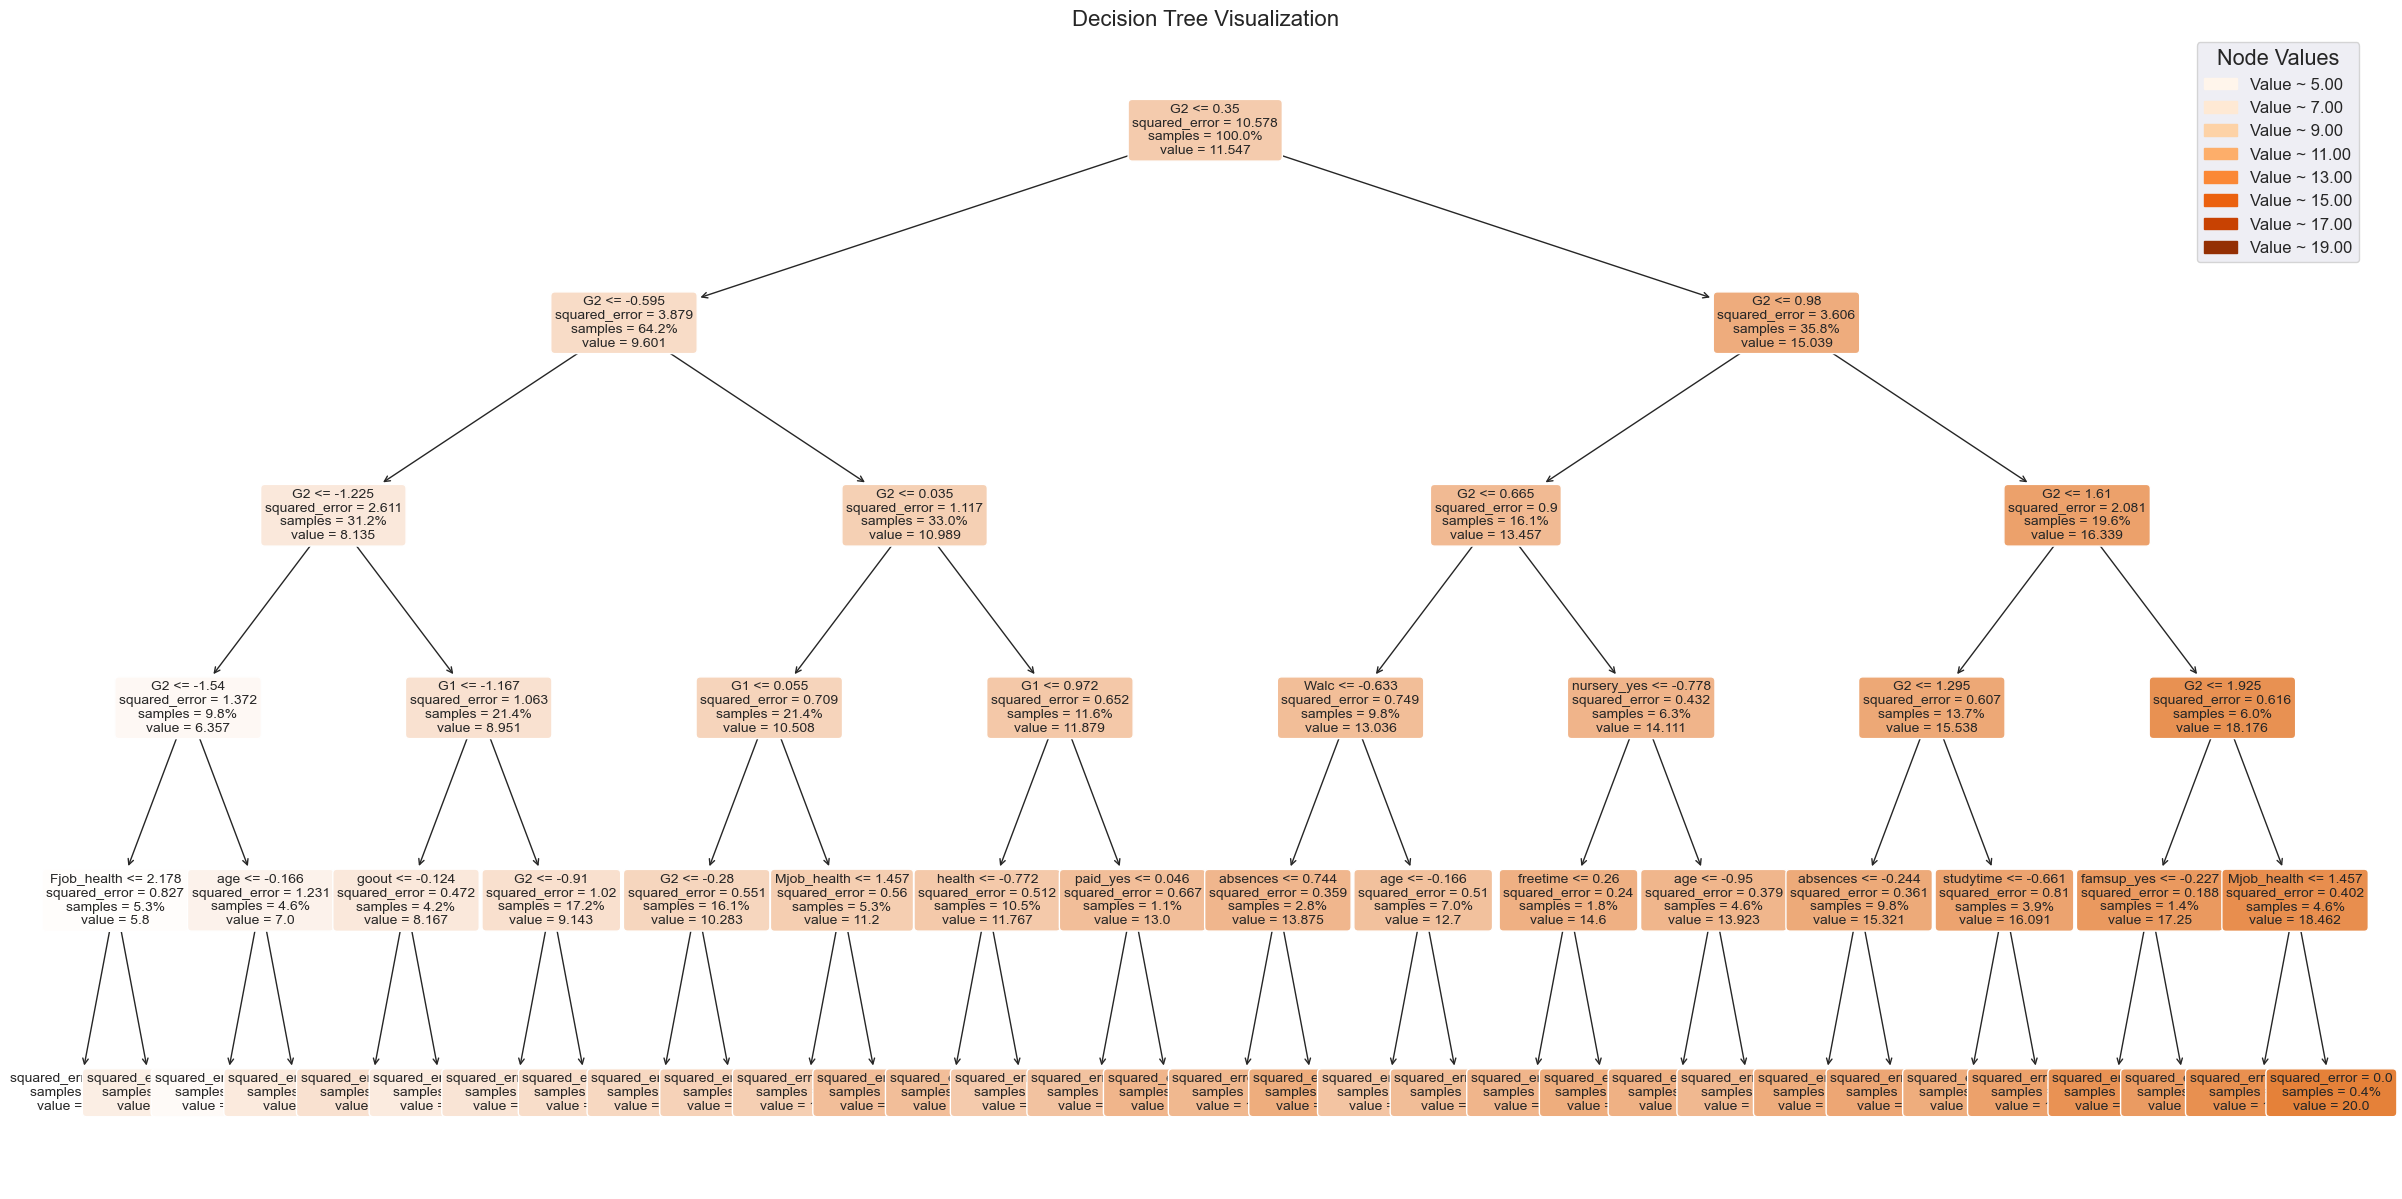

In [83]:
# Visualizing the Decision Tree
plt.figure(figsize=(30, 15))
tree_plot = plot_tree(
    dt_model2,
    feature_names=X.columns,
    filled=True,                
    rounded=True,               
    fontsize=10,
    proportion=True             
)

cmap = plt.cm.Oranges
norm = plt.Normalize(dt_model2.tree_.value.min(), dt_model2.tree_.value.max())

# Create color patches for legend
legend_patches = [
    mpatches.Patch(color=cmap(norm(value)), label=f"Value ~ {value:.2f}")
    for value in range(int(dt_model2.tree_.value.min()), int(dt_model2.tree_.value.max()) + 1, 2)
]

# Add the custom legend
plt.legend(handles=legend_patches, loc="upper right", fontsize=12, title="Node Values")
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()# Predict with Decision Tree

In [84]:
# Define the known data for the new student, setting defaults for categorical (one-hot encoded) variables
new_student = pd.DataFrame([{
    'age': 22,
    'Medu': 4,
    'Fedu': 4,
    'traveltime': 2,
    'studytime': 2,
    'failures': 0,
    'famrel': 4,
    'freetime': 3,
    'goout': 4,
    'Dalc': 1,
    'Walc': 1,
    'health': 3,
    'absences': 4,
    'G1': 14,
    'G2': 12,
    # One-hot encoded features: setting to 0 or 1 as appropriate for a new student
    'school_MS': 0,
    'sex_M': 1,
    'address_U': 1,
    'famsize_LE3': 0,
    'Pstatus_T': 0,
    'Mjob_health': 0,
    'Mjob_other': 1,
    'Mjob_services': 0,
    'Mjob_teacher': 0,
    'Fjob_health': 0,
    'Fjob_other': 1,
    'Fjob_services': 0,
    'Fjob_teacher': 0,
    'reason_home': 0,
    'reason_other': 0,
    'reason_reputation': 1,
    'guardian_mother': 0,
    'guardian_other': 0,
    'schoolsup_yes': 0,
    'famsup_yes': 1,
    'paid_yes': 0,
    'activities_yes': 1,
    'nursery_yes': 1,
    'higher_yes': 1,
    'internet_yes': 1,
    'romantic_yes': 0
}], columns=X_train.columns)

# Scale the new student's data using the same scaler that was used during training
new_student_scaled = scaler2.transform(new_student)

# Convert new_student_data into a DataFrame with the same column structure as the training data
new_student_scaled = pd.DataFrame(new_student_scaled, columns=X_train.columns)

# Make a prediction with the model
predicted_grade = dt_model2.predict(new_student_scaled)

# Display the predicted final grade
print(f"Predicted Final Grade: {predicted_grade[0]:.2f}")


Predicted Final Grade: 11.63


### Random Forest Model

In [86]:
# Initialize the Random Forest model
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model2.predict(X_test_scaled)

# Display the first few predictions
print("Predicted Grades:", y_pred_rf[:5])
print("Actual Grades:", y_test[:5].values)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.2f}")

Predicted Grades: [11.7  18.45 10.58  9.61 15.62]
Actual Grades: [12 18 11  9 15]
Random Forest - Mean Squared Error: 0.67
Random Forest - Mean Absolute Error: 0.60
Random Forest - R² Score: 0.93


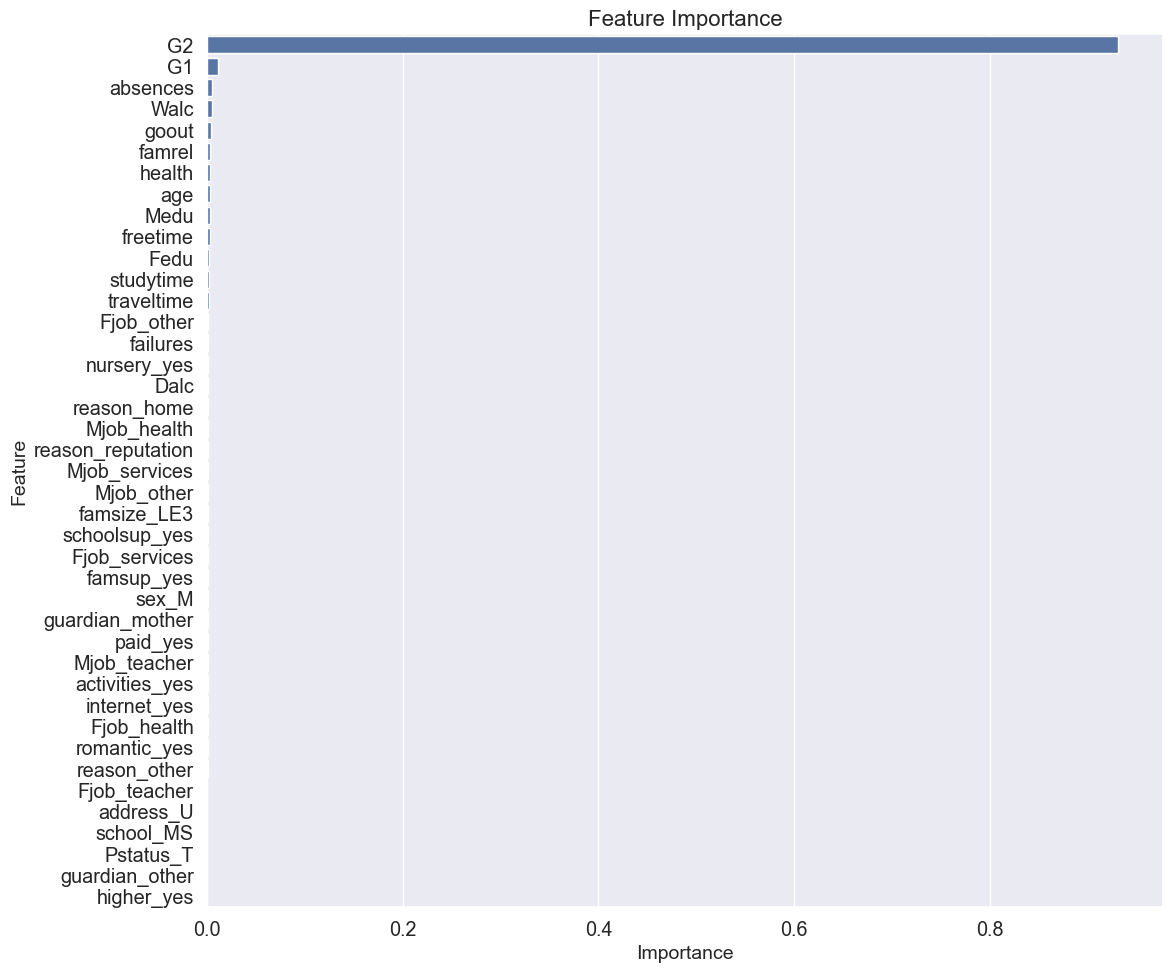

In [87]:
importances = rf_model2.feature_importances_
features = X.columns

# Sort indices by importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Increase figure size and use a horizontal bar plot for better readability
plt.figure(figsize=(12, 10))
sns.barplot(x=importances[sorted_indices], y=[features[i] for i in sorted_indices])

# Add titles and labels
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Although it's not much, age has a factor in the final grade. Which in retrospect, it most likely refers to the fact that older age = more developed brain, increasing the chance for a higher grade.

### Inferencing

In [90]:
# Define the known data for the new student, setting defaults for categorical (one-hot encoded) variables
new_student = pd.DataFrame([{
    'age': 22,
    'Medu': 4,
    'Fedu': 4,
    'traveltime': 2,
    'studytime': 2,
    'failures': 0,
    'famrel': 4,
    'freetime': 3,
    'goout': 4,
    'Dalc': 1,
    'Walc': 1,
    'health': 3,
    'absences': 4,
    'G1': 14,
    'G2': 12,
    # One-hot encoded features: setting to 0 or 1 as appropriate for a new student
    'school_MS': 0,
    'sex_M': 1,
    'address_U': 1,
    'famsize_LE3': 0,
    'Pstatus_T': 0,
    'Mjob_health': 0,
    'Mjob_other': 1,
    'Mjob_services': 0,
    'Mjob_teacher': 0,
    'Fjob_health': 0,
    'Fjob_other': 1,
    'Fjob_services': 0,
    'Fjob_teacher': 0,
    'reason_home': 0,
    'reason_other': 0,
    'reason_reputation': 1,
    'guardian_mother': 0,
    'guardian_other': 0,
    'schoolsup_yes': 0,
    'famsup_yes': 1,
    'paid_yes': 0,
    'activities_yes': 1,
    'nursery_yes': 1,
    'higher_yes': 1,
    'internet_yes': 1,
    'romantic_yes': 0
}], columns=X_train.columns)

# Scale the new student's data using the same scaler that was used during training
new_student_scaled = scaler2.transform(new_student)

# Convert new_student_data into a DataFrame with the same column structure as the training data
new_student_scaled = pd.DataFrame(new_student_scaled, columns=X_train.columns)

# Make a prediction with the model
predicted_grade = rf_model2.predict(new_student_scaled)

# Display the predicted final grade
print(f"Predicted Final Grade: {predicted_grade[0]:.2f}")

Predicted Final Grade: 12.16


## Conclusion
In this little experiment, I looked at the impact of including all available features — both academic and demographic — on the model’s ability to predict students’ final grades. Surprisingly, even with features like age and sex, which aren’t directly related to academic performance, the model maintained a reasonable level of accuracy. This suggests that the Linear Regression model can still identify patterns and relationships between these features and the target variable (G3).

An interesting observation is that certain demographic features, such as sex or whether the father is the guardian, seemed to correlate with higher predicted grades. This could indicate biases in the dataset or model, where attributes unrelated to academics might influence predictions. These patterns really do raise questions about the fairness and ethics of predictive models in educational settings, especially if features introduce bias into the results.

While this approach did not severely reduce accuracy, it still shows the importance of feature selection. For a more robust and accurate model, excluding demographic features would be better to make sure the predictions rely on factors within the student’s control, like study habits and prior grades, rather than biased demographic characteristics.